# PyTorch

[pytorch](http://pytorch.org/) is a new framework for efficient tesnor processing and dynamic computational graphs - both of which are required for Deep Learning applications and research. While [tensorflow](https://www.tensorflow.org/) is clearly leading this space at the moment, `pytorch` feels much more pythonic and easy to use.

The best place to start is this notebook: [Deep Learning with PyTorch: a 60-minute blitz](https://github.com/pytorch/tutorials/blob/master/Deep%20Learning%20with%20PyTorch.ipynb)

In this notebook, I plan to cover the following topics:
* Simple Linear Regression
* [WIP] word2vec
* [WIP] GloVe
* [WIP] Variational Autoencoder

## Torch classes/functions for reference
Creation ops:
* `torch.eye`
* `torch.from_numpy`, `torch.numpy`
* `torch.linspace`, `torch.logspace`, `torch.range`
* `torch.ones`, `torch.zeros`, `torch.rand`, `torch.randn`, `torch.randperm`

Slicing/Joining/Indexing:
* `torch.cat`, `torch.gather`, `torch.chunk`, `torch.index_select`, `torch.masked_select`, `torch.nonzero`
* `torch.split`, `torch.squeeze`, `torch.stack`, `torch.t`, `torch.transpose`

Distributions:
* `torch.bernoulli`, `torch.multinomial`, `torch.normal`

Load/save:
* `torch.save`, `torch.load`

Math:
* `torch.abs`, `torch.acos`, `torch.add`, `torch.addcdiv`, `torch.addcmul`, `torch.asin`, `torch.atan`, `torch.atan2`, `torch.ceil`, `torch.clamp`, `torch.cos`, `torch.cosh`, `torch.div`, `torch.exp`, `torch.floor`, `torch.fmod`, `torch.frac`, `torch.lerp`, `torch.log`, `torch.log1p`, `torch.mul`, `torch.neg`, `torch.pow`, `torch.reciprocal`, `torch.remainder`, `torch.round`, `torch.rsqrt`, `torch.sigmoid`, `torch.sign`, `torch.sin`, `torch.sinh`, `torch.sqrt`, `torch.tan`, `torch.tanh`, `torch.trunc`
* `torch.cumprod`, `torch.cumsum`, `torch.dist`, `torch.mean`, `torch.median`, `torch.mode`, `torch.norm`, `torch.prod`, `torch.std`, `torch.sum`, `torch.var`
* `torch.eq`, `torch.equal`, `torch.ge`, `torch.gt`, `torch.kthvalue`, `torch.le`, `torch.lt`, `torch.max`, `torch.min`, `torch.ne`, `torch.sort`, `torch.topk`
* `torch.cross`, `torch.diag`, `torch.histc`, `torch.renorm`, `torch.trace`, `torch.tril`, `torch.triu`
* `torch.addbmm`, `torch.addmv`, `torch.addr`, `torch.baddbmm`, `torch.bmm`, `torch.dot`, `torch.eig`, `torch.gels`, `torch.ger`, `torch.gesv`, `torch.inverse`, `torch.mm`, `torch.mv`, `torch.qr`, `torch.svd`, `torch.symeig`

Tensors:
* `torch.FloatTensor`, `torch.cuda.FloatTensor`, `torch.DoubleTensor`, `torch.cuda.DoubleTensor`, `torch.cuda.HalfTensor`, `torch.ByteTensor`, `torch.cuda.ByteTensor`, `torch.CharTensor`, `torch.ShortTensor`, `torch.IntTensor`, `torch.LongTensor`
* `torch.Storage` (`torch.FloatStorage`)

`torch.nn.Module` has these important functions:
* `forward`, `children`, `parameters`, `train`, `eval`, `zero_grad`

Convolution Layers:
* `torch.nn.Conv1d`, `torch.nn.Conv2d`, `torch.nn.Conv3d`, `torch.nn.ConvTranspose1d`, `torch.nn.ConvTranspose2d`, `torch.nn.ConvTranspose3d`

Pooling Layers:
* `torch.nn.MaxPool1d`, `torch.nn.MaxPool2d`, `torch.nn.MaxPool3d`, `torch.nn.MaxUnpool1d`, `torch.nn.MaxUnpool2d`, `torch.nn.MaxUnpool3d`, `torch.nn.AvgPool1d`, `torch.nn.AvgPool2d`, `torch.nn.AvgPool3d`, `torch.nn.FractionalMaxPool2d`, `torch.nn.LPPool2d`

Non-linear Activations:
* `torch.nn.ReLU`, `torch.nn.ReLU6`, `torch.nn.ELU`, `torch.nn.PReLU`, `torch.nn.LeakyReLU`, `torch.nn.Threshold`, `torch.nn.Hardtanh`, `torch.nn.Sigmoid`, `torch.nn.Tanh`, `torch.nn.LogSigmoid`, `torch.nn.Softplus`, `torch.nn.Softshrink`, `torch.nn.Softsign`, `torch.nn.Tanhshrink`, `torch.nn.Softmin`, `torch.nn.Softmax`, `torch.nn.LogSoftmax`

Normalization Layers:
* `torch.nn.BatchNorm1d`, `torch.nn.BatchNorm2d`, `torch.nn.BatchNorm3d`

Recurrent Layers:
* `torch.nn.RNN`, `torch.nn.LSTM`, `torch.nn.GRU`, `torch.nn.RNNCell`, `torch.nn.LSTMCell`, `torch.nn.GRUCell`

Linear Layers:
* `torch.nn.Linear`

Dropout:
* `torch.nn.Dropout`, `torch.nn.Dropout2d`, `torch.nn.Dropout3d`

Sparse Layers:
* `torch.nn.Embedding`

Loss Functions:
* `torch.nn.L1Loss`, `torch.nn.MSELoss`, `torch.nn.CrossEntropyLoss`, `torch.nn.NLLLoss`, `torch.nn.KLDivLoss`, `torch.nn.BCELoss`, `torch.nn.MarginRankingLoss`, `torch.nn.HingeEmbeddingLoss`, `torch.nn.MultiLabelMarginLoss`, `torch.nn.SmoothL1Loss`, `torch.nn.SoftMarginLoss`, `torch.nn.MultiLabelSoftMarginLoss`, `torch.nn.CosineEmbeddingLoss`, `torch.nn.MultiMarginLoss`

Other Layers:
* `torch.nn.PixelShuffle`, `torch.nn.DataParallel`

`torch.nn.functional` methods:
* `F.conv1d`, `F.conv2d`, `F.conv3d`, `F.conv_transpose1d`, `F.conv_traspose2d`, `F.conv_transpose3d`
* `F.avg_pool1d`, `F.avg_pool2d`, `F.avg_pool3d`, `F.max_pool1d`, `F.max_pool2d`, `F.max_pool3d`, `F.max_unpool1d`, `F.max_unpool2d`, `F.max_unpool3d`, `F.lp_pool2d`
* `F.threshold`, `F.relu`, `F.hardtanh`, `F.relu6`, `F.elu`, `F.leaky_relu`, `F.prelu`, `F.rrelu`, `F.logsigmoid`, `F.hardshrink`, `F.tanhshrink`, `F.softsign`, `F.softplus`, `F.softmin`, `F.softmax`, `F.softshrink`, `F.log_softmax`, `F.tanh`, `F.sigmoid`
* `F.batch_norm`, `F.linear`, `F.dropout`
* `F.nll_loss`, `F.kl_div`, `F.cross_entropy`, `F.binary_cross_entropy`, `F.smooth_l1_loss`, `F.pixel_shuffle`

`torch.optim` optimizers:
* `torch.optim.Adadelta`, `torch.optim.adagrad`, `torch.optim.Adam`, `torch.optim.Adamax`, `torch.optim.ASGD`, `torch.optim.RMSProp`, `torch.optim.RProp`, `torch.optim.SGD`

`torch.autograd`:
* `torch.autograd.Variable`, `torch.autograd.Function`

In [1]:
%matplotlib inline
from torch.autograd import Variable

import collections
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import torch
import torch.nn.functional as F

## Linear Regression

Steps:
1. Generate dummy data.
2. Use a single Linear layer for regression.
3. Use Adam optimizer on the final MSELoss to propagate back the gradients.

Finally, we plot the predicted values against the actual values. For comparison, we plot the scikit-learn LinearRegression prediction as well.

Please note that evaluation is in-sample - which is generally not recommended for any real use case. However, we took this liberty because the aim is to see some simple examples of `pytorch`.

Loss: 0.693507 Batch: 0
Loss: 0.614173 Batch: 1
Loss: 0.547842 Batch: 2
Loss: 0.493483 Batch: 3
Loss: 0.448999 Batch: 4
Loss: 0.412849 Batch: 5
Loss: 0.383977 Batch: 6
Loss: 0.361221 Batch: 7
Loss: 0.343239 Batch: 8
Loss: 0.328674 Batch: 9
Loss: 0.316344 Batch: 10
Loss: 0.305370 Batch: 11
Loss: 0.295198 Batch: 12
Loss: 0.285540 Batch: 13
Loss: 0.276292 Batch: 14
Loss: 0.267450 Batch: 15
Loss: 0.259054 Batch: 16
Loss: 0.251142 Batch: 17
Loss: 0.243744 Batch: 18
Loss: 0.236886 Batch: 19
Weights: Parameter containing:
 0.5551  1.0381 -0.5380 -0.7105  0.8210
[torch.FloatTensor of size 1x5]

Biases: Parameter containing:
1.00000e-02 *
  1.5685
[torch.FloatTensor of size 1]



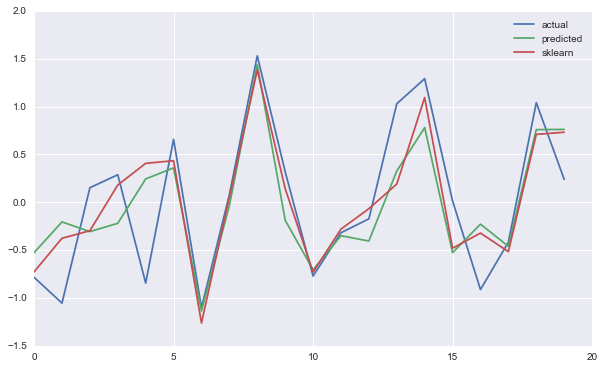

In [2]:
# Number of features
num_features = 5

# Function to generate Dummy data
# Returns X (batch_size, num_features) and y (batch_size)
def get_batch(batch_size=20):
    X = torch.randn((batch_size, num_features))
    X = torch.normal(torch.zeros(batch_size, num_features), torch.zeros(batch_size, num_features).fill_(0.5))
    y = torch.mm(X, torch.randn((num_features, 1)))
    
    # Add noise
    y += torch.normal(torch.zeros(batch_size), torch.zeros(batch_size).fill_(0.1))
    y += torch.Tensor((batch_size)).uniform_(-1, 1)
    
    return Variable(X), Variable(y)

# Linear function
fc = torch.nn.Linear(num_features, 1)

# MSE loss function
mse_loss = torch.nn.MSELoss()

# SGD/Adam optimizer
optimizer = torch.optim.Adam(fc.parameters(), lr=0.05)

# Get the training data
X_train, y_train = get_batch()

for batch_idx in range(20):
    
    # Reset gradients
    fc.zero_grad()
    
    # Forward pass
    output = fc(X_train)
    
    # Compute the loss using the predicted output and y_train
    # loss = F.smooth_l1_loss(output, y_train)
    loss = mse_loss(output, y_train)
    
    # Backward pass
    loss.backward()
    
    # Apply gradients
    optimizer.step()

    # Stop criterion
    if loss.data[0] < 1e-3:
        break
        
    print('Loss: {:.6f} Batch: {}'.format(loss.data[0], batch_idx))

# print weights for debugging
print('Weights: {}'.format(fc.weight))
print('Biases: {}'.format(fc.bias))

# Scikit-learn - for comparison!
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr.fit(X_train.data.numpy(), y_train.data.numpy())
y_lr = lr.predict(X_train.data.numpy())

# Plot the actual against the predicted Y
plt.figure(figsize=(10, 6))
plt.plot(y_train.data.numpy().reshape(y_train.size()[0]), label='actual')
plt.plot(output.data.numpy().reshape(output.size()[0]), label='predicted')
plt.plot(y_lr, label='sklearn')
plt.legend()

## word2vec (simplified)

Next, we will try a simplified version of word2vec.

Steps:
1. Download the dataset and create training batches.
1. 

In [3]:
# Model parameters
vocabulary = 50000
embedding = 128

# Read data
words = open('../data/text8').read().strip().split()
print('Data size: {}'.format(len(words)))
data, dictionary = [], {}
count = [['UNK', -1]]
count.extend(collections.Counter(words).most_common(vocabulary - 1))
dictionary = dict()
for word, _ in count:
    dictionary[word] = len(dictionary)
for word in words:
    if word in dictionary:
        data.append(dictionary[word])
    else:
        data.append(0)

data_index = 0
def generate_batch(batch_size):
    global data_index
    batch, labels = [], []
    for i in range(batch_size):
        batch.append(data[(data_index + i) % len(data)])
        labels.append(data[(data_index + i + 1) % len(data)])
    data_index = (data_index + batch_size) % len(data)
    return Variable(torch.LongTensor(batch)), Variable(torch.LongTensor(labels))

# Let's define the word2vec model
class Word2Vec(torch.nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        
        self.emb = torch.nn.Embedding(vocabulary, embedding)
        self.emb.weight.data.uniform_(-0.1, 0.1)
        
        self.weights = torch.nn.Embedding(vocabulary, embedding)
        self.biases = torch.nn.Embedding(vocabulary, 1)
        
    def sample(self, num_samples, labels):
        """
        Sample negative points
        TODO - sample from the recommended unigram distribution
        http://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf
        For now, we will simply use random.randint() function
        """
        sampled_ids = [random.randint(0, vocabulary - 1) for i in range(num_samples)]
        sampled_ids = list(set(sampled_ids) - set(labels))
        return Variable(torch.LongTensor(sampled_ids))
        
    def forward(self, inputs, labels):
        # Get the input vectors from the input embedding layer
        inp = self.emb(inputs)
        
        # Get the corresponding label weights and biases
        inp_wt = self.weights(labels)
        inp_b = self.biases(labels)
        
        # Row-wise dot product + bias
        # inp.data shape is (batch_size, embedding_dim)
        # inp_wt.data shape is (batch_size, embedding_dim)
        # inp_b.data shape is (batch_size, 1)
        A, B = inp.data, inp_wt.data
        label_logits = [torch.dot(a, b) for a, b in zip(torch.split(A, 1), torch.split(B, 1))]
        label_logits = torch.Tensor(label_logits)
        label_logits += inp_b.data
        
        sampled_ids = self.sample(50, labels)
        
        # Get the weights and biases for the sampled points
        sample_wt = self.weights(sampled_ids)
        sample_b = self.biases(sampled_ids)
        
        # inp.data shape is (batch_size, embedding_dim)
        # sample_wt.data shape is (num_samples, embedding_dim)
        # sample_b.data shape is (num_samples, 1)
        # We need to multiple inp.data with transpose(sample_wt.data) and add sample_b.data to dim=1
        sample_logits = torch.mm(inp.data, torch.transpose(sample_wt.data, 0, 1))
        sample_logits += torch.transpose(torch.cat([sample_b.data for i in range(inp.data.size()[0])], 1), 0, 1)
        
        # sample_logits shape is (batch_size, num_samples)
        # Let's split that up and make it consistent with label_logits
        sample_logits = torch.squeeze(torch.cat(torch.split(sample_logits, 1, dim=1)))
        # sample_logits shape is (batch_size * num_samples)
        
        # Combine true and sampled logits & labels
        print(label_logits.size(), sample_logits.size())
        logits = torch.cat([label_logits, sample_logits], 0)
        all_labels = torch.LongTensor([1] * label_logits.size()[0] + [0] * sample_logits.size()[0])
        # all_labels = torch.cat([torch.ones((label_logits.size()[0])), torch.zeros((sample_logits.size()[0]))], 0)
        
        return Variable(logits), Variable(all_labels)
    
model = Word2Vec()
opt = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(1):
    # Reset gradients
    model.zero_grad()
    
    # Get the next batch of training data
    batch_inputs, batch_labels = generate_batch(32)
    
    # Compute the loss
    logits, labels = model(batch_inputs, batch_labels)
    loss = F.cross_entropy(F.softmax(logits), labels)
    
    # Backward pass - compute gradients
    loss.backward()
    
    # Apply gradients
    optimizer.step()

Data size: 17005207
torch.Size([32]) torch.Size([1600])


RuntimeError: there are no graph nodes that require computing gradients